In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datagovindia import DataGovIndia
from fuzzywuzzy import process

In [2]:
# To Sync The Data From Source
MY_API_KEY = "579b464db66ec23bdd000001973d3e2bd75e45f07473b608e00799e8"

datagovin = DataGovIndia(MY_API_KEY) # Specify API key if not set as an environment variable
# datagovin.sync_metadata(7000 , 20)

In [27]:
## IMPORTANT FUNCTIONS ##

# searching available dataframes by name
def search_datagov(search_term , columns = ['title', 'description']):
    search_data = datagovin.search(search_term)
    # search_data = datagovin.search(search_term , search_fields=columns)

    if len(search_data) > 0:

        search_titles = search_data['title']
        search_id = search_data['resource_id']

        # for res in zip(search_id , search_titles):
        #     print(res)

        return zip(search_id , search_titles)
    
    return "Not Found"

# getting a resource by ID, onvert it to csv as well
def datagov_data(r_id , save=False , filename = ''):
    data = datagovin.get_data(r_id)
    if save:
        data.to_csv(filename, index=False)

    print(data.columns)
    print(data.sample(5))
    return data

# show the non-intersecting columns of the 2 dfs, little outdated
def show_unmerged(df1 , df2 , col):
    # Perform an outer merge
    merged_outer = pd.merge(df1, df2, how='outer', on=col, indicator=True)

    # Filter out rows that were included in the inner merge
    deleted_rows = merged_outer[merged_outer['_merge'] == 'left_only']

    # Print the deleted rows
    print(deleted_rows)


# get population of the state (Census 2011)
def get_state_pop(state):
    india_df = pd.read_excel("2011-IndiaState.xlsx")
    
    # print(india_df.columns)

    states_total = india_df[['Name','TRU','TOT_P']][india_df['TRU'] == 'Total']
    states_total = states_total[['Name' , 'TOT_P']]
    
    best_match = process.extract(state, states_total['Name'], limit=1)[0][0]
    print("Matched Value:" , best_match)
    
    return states_total[states_total['Name'] == best_match]['TOT_P'].astype('int32').tolist()[0]


# rename all states so they are identical and ready for merging
def standardize_states(state_col , category='new'):
    s_states = []

    # Iterate over each state name in the 'state' column
    for state in state_col:
        # Apply the standardize_states function to the state name and append the result to the list
        state_name = get_state_name(state , category)
        s_states.append(state_name)

    return s_states


# helper for standardize_states
def get_state_name(state , category):
    if category == 'old':
        india_df = pd.read_csv("C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\Lucknow\\old_states.csv") # using these values of states as base
    else:
        india_df = pd.read_csv("C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\Lucknow\\new_states.csv") # using these values of states as base
    
    # print(india_df.columns)

    states_total = india_df[['state_ut']]

    states_total['state_ut'] = states_total['state_ut'].str.upper()
 
    best_match = process.extract(state.upper(), states_total['state_ut'], limit=1)[0][0]
    print("Matched Value:" , best_match)
    
    return best_match


In [4]:
# SEARCH DATASETS

result = search_datagov("Bathing Facility")

for x in result:
    print(x)

('d3df1a9b-33c1-4765-aa96-cf4d4b96e3d1', 'State/ UT-wise Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')
('a9937e44-d079-4b49-a54b-73242024f8f6', 'State/ UT-wise Scheduled Caste (SC) Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')
('1892c61d-a16f-46db-bcc3-d2b6f870c119', 'State/ UT-wise Scheduled Tribe (ST) Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')
('ddb842c9-2024-43a5-9746-621d7caf7e19', 'State/ UT-wise Slum Households by Availability of Bathing facility and type of Drainage Connectivity for waste Water outl

In [7]:
'''
('d3df1a9b-33c1-4765-aa96-cf4d4b96e3d1', 'State/ UT-wise Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')

('a9937e44-d079-4b49-a54b-73242024f8f6', 'State/ UT-wise Scheduled Caste (SC) Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')

('1892c61d-a16f-46db-bcc3-d2b6f870c119', 'State/ UT-wise Scheduled Tribe (ST) Households by Availability of Bathing Facility and type of Drainage Connectivity for waste water outlet -Urban (in reply to Unstarred Question for 10-08-2017) (From: Ministry of Housing and Urban Affairs )')
'''
title_csv1 = "total_households.csv"
data_tot = datagov_data("d3df1a9b-33c1-4765-aa96-cf4d4b96e3d1" , True , title_csv1)

title_csv2 = "total_households_SC.csv"
data_sc = datagov_data("a9937e44-d079-4b49-a54b-73242024f8f6" , True , title_csv2)

title_csv3 = "total_households_ST.csv"
data_st = datagov_data("1892c61d-a16f-46db-bcc3-d2b6f870c119" , True , title_csv3)

Index(['area_name', 'total_number_of_households',
       'number_of_households_having_bathing_facility_within_the_premises___yes___bathroom',
       'number_of_households_having_bathing_facility_within_the_premises___yes___enclosure_without_roof',
       'number_of_households_having_bathing_facility_within_the_premises___no',
       'waste_water_outlet_connected_to___closed_drainage',
       'waste_water_outlet_connected_to___open_drainage',
       'waste_water_outlet_connected_to___no_drainage'],
      dtype='object')
     area_name  total_number_of_households  \
8    Rajasthan                     3090940   
5    Uttarakha                      592223   
0        India                    78865937   
3       Punjab                     2094067   
33  Tamil Nadu                     8929104   

    number_of_households_having_bathing_facility_within_the_premises___yes___bathroom  \
8                                             2450425                                   
5                   

In [61]:
data_tot = pd.read_csv(title_csv1)
data_sc = pd.read_csv(title_csv2)
data_st = pd.read_csv(title_csv3)

In [62]:
# DATA CLEANING FOR GOV DATA

df1 = data_tot[["area_name" , "total_number_of_households"]].copy()
df2 = data_sc[["area_name" , "total_number_of_households"]].copy()
df3 = data_st[["area_name" , "total_number_of_households"]].copy()

df1.columns = ['area_name' , 'total_number_of_households']
df2.columns = ['area_name' , 'total_number_of_households_sc']
df3.columns = ['area_name' , 'total_number_of_households_st']

df1['total_number_of_households'] = df1['total_number_of_households'].astype('int')
df2['total_number_of_households_sc'] = df2['total_number_of_households_sc'].astype('int')
df3['total_number_of_households_st'] = df3['total_number_of_households_st'].astype('int')

df1['area_name'] = standardize_states(df1['area_name'] , 'old')
df2['area_name'] = standardize_states(df2['area_name'] , 'old')
df3['area_name'] = standardize_states(df3['area_name'] , 'old')

# x1 = df1['area_name'].tolist()
# x2 = df2['area_name'].tolist()
# x3 = df3['area_name'].tolist()
# for i in x1:
#     if i not in x3:
#         print(i)

# merging 
df = pd.merge(df1 , df2 , how="left" , on="area_name")
df = pd.merge(df , df3 , how="left" , on="area_name")
df.fillna(0 , inplace=True)
df

# df['total_cimes'] = df['crimes_ST'] + df['crimes_SC']

# df['state'] = standardize_states(df['state'])

# df

Matched Value: JAMMU AND KASHMIR
Matched Value: HIMACHAL PRADESH
Matched Value: PUNJAB
Matched Value: CHANDIGARH
Matched Value: UTTARAKHAND
Matched Value: HARYANA
Matched Value: NCT OF DELHI
Matched Value: RAJASTHAN
Matched Value: UTTAR PRADESH
Matched Value: BIHAR
Matched Value: SIKKIM
Matched Value: ARUNACHAL PRADESH
Matched Value: NAGALAND
Matched Value: MANIPUR
Matched Value: MIZORAM
Matched Value: TRIPURA
Matched Value: MEGHALAYA
Matched Value: ASSAM
Matched Value: WEST BENGAL
Matched Value: JHARKHAND
Matched Value: ODISHA
Matched Value: CHHATTISGARH
Matched Value: MADHYA PRADESH
Matched Value: GUJARAT
Matched Value: DAMAN AND DIU
Matched Value: DADRA AND NAGAR HAVELI
Matched Value: MAHARASHTRA
Matched Value: ANDHRA PRADESH
Matched Value: KARNATAKA
Matched Value: GOA
Matched Value: LAKSHADWEEP
Matched Value: KERALA
Matched Value: TAMIL NADU
Matched Value: PUDUCHERRY
Matched Value: ANDAMAN AND NICOBAR ISLANDS
Matched Value: JAMMU AND KASHMIR
Matched Value: HIMACHAL PRADESH
Matched 

,area_name,total_number_of_households,total_number_of_households_sc,total_number_of_households_st
0,JAMMU AND KASHMIR,517168,40145.0,18712.0
1,HIMACHAL PRADESH,166043,30610.0,7791.0
2,PUNJAB,2094067,564681.0,0.0
3,CHANDIGARH,228276,42921.0,0.0
4,UTTARAKHAND,592223,84813.0,12692.0
5,HARYANA,1751901,327075.0,0.0
6,NCT OF DELHI,3261423,553888.0,0.0
7,RAJASTHAN,3090940,503928.0,132119.0
8,UTTAR PRADESH,7449195,1113083.0,153150.0
9,BIHAR,2013671,247750.0,35984.0


In [64]:
avg_tot_sc = []
avg_tot_st = []

for i in df.index:
    if df['total_number_of_households_sc'][i] != 0:
        avg_tot_sc.append(df['total_number_of_households_sc'][i] / df['total_number_of_households'][i])

    if df['total_number_of_households_st'][i] != 0:
        avg_tot_st.append(df['total_number_of_households_st'][i] / df['total_number_of_households'][i])

avg_sc_household_ratio = np.average(avg_tot_sc)
avg_st_household_ratio = np.average(avg_tot_st)

print("avg_sc_household_ratio" , avg_sc_household_ratio)
print("avg_st_household_ratio" , avg_st_household_ratio)

for i in df.index:
    if df['total_number_of_households_sc'][i] == 0:
        df['total_number_of_households_sc'][i] = df['total_number_of_households'][i] * avg_sc_household_ratio

    if df['total_number_of_households_st'][i] == 0:
        df['total_number_of_households_st'][i] = df['total_number_of_households'][i] * avg_st_household_ratio

df


avg_sc_household_ratio 0.1278593706045157
avg_st_household_ratio 0.1797098086217496


C:\Users\Ojasva Saxena\AppData\Local\Temp\ipykernel_39080\3916663544.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['total_number_of_households_st'][i] = df['total_number_of_households'][i] * avg_st_household_ratio
C:\Users\Ojasva S

,area_name,total_number_of_households,total_number_of_households_sc,total_number_of_households_st
0,JAMMU AND KASHMIR,517168,4.014500e+04,18712.000000
1,HIMACHAL PRADESH,166043,3.061000e+04,7791.000000
2,PUNJAB,2094067,5.646810e+05,376324.379811
3,CHANDIGARH,228276,4.292100e+04,41023.436273
4,UTTARAKHAND,592223,8.481300e+04,12692.000000
5,HARYANA,1751901,3.270750e+05,314833.793434
6,NCT OF DELHI,3261423,5.538880e+05,586109.703165
7,RAJASTHAN,3090940,5.039280e+05,132119.000000
8,UTTAR PRADESH,7449195,1.113083e+06,153150.000000
9,BIHAR,2013671,2.477500e+05,35984.000000


In [71]:
df['sc_st_ratio_households'] = ((df['total_number_of_households_sc'] + df['total_number_of_households_st']) / df['total_number_of_households'] ) * 100
df

,area_name,total_number_of_households,total_number_of_households_sc,total_number_of_households_st,sc_st_ratio_households
0,JAMMU AND KASHMIR,517168,4.014500e+04,18712.000000,11.380635
1,HIMACHAL PRADESH,166043,3.061000e+04,7791.000000,23.127142
2,PUNJAB,2094067,5.646810e+05,376324.379811,44.936737
3,CHANDIGARH,228276,4.292100e+04,41023.436273,36.773220
4,UTTARAKHAND,592223,8.481300e+04,12692.000000,16.464237
5,HARYANA,1751901,3.270750e+05,314833.793434,36.640700
6,NCT OF DELHI,3261423,5.538880e+05,586109.703165,34.953997
7,RAJASTHAN,3090940,5.039280e+05,132119.000000,20.577785
8,UTTAR PRADESH,7449195,1.113083e+06,153150.000000,16.998253
9,BIHAR,2013671,2.477500e+05,35984.000000,14.090385


In [74]:
# Readying Geodata File

shp_path =  "C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\maps-master\\maps-master\\Survey-of-India-Index-Maps\\stateBoundary\\stateBoundary.shp"
# shp_path = "C:\\Users\\Ojasva Saxena\\Desktop\\Personal\\Maps\\maps-master\\maps-master\\States\\Admin2.shp" # with Ladakh
map_gdf = gpd.read_file(shp_path)

map_gdf.columns = ['state' , 'geometry']
map_gdf['state'] = standardize_states(map_gdf['state'] , 'old')

Matched Value: ANDAMAN AND NICOBAR ISLANDS
Matched Value: CHANDIGARH
Matched Value: DADRA AND NAGAR HAVELI
Matched Value: DAMAN AND DIU
Matched Value: NCT OF DELHI
Matched Value: HARYANA
Matched Value: JHARKHAND
Matched Value: KARNATAKA
Matched Value: KERALA
Matched Value: LAKSHADWEEP
Matched Value: MADHYA PRADESH
Matched Value: MAHARASHTRA
Matched Value: ODISHA
Matched Value: PUDUCHERRY
Matched Value: TAMIL NADU
Matched Value: CHHATTISGARH
Matched Value: GOA
Matched Value: ANDHRA PRADESH
Matched Value: PUDUCHERRY
Matched Value: GOA
Matched Value: JAMMU AND KASHMIR
Matched Value: HIMACHAL PRADESH
Matched Value: PUNJAB
Matched Value: RAJASTHAN
Matched Value: GUJARAT
Matched Value: UTTARAKHAND
Matched Value: UTTAR PRADESH
Matched Value: SIKKIM
Matched Value: ASSAM
Matched Value: ARUNACHAL PRADESH
Matched Value: NAGALAND
Matched Value: MANIPUR
Matched Value: MIZORAM
Matched Value: TRIPURA
Matched Value: MEGHALAYA
Matched Value: WEST BENGAL
Matched Value: BIHAR


In [75]:
# MERGE MAP TO GOVT DF

map_data = pd.merge(map_gdf , df , how='left' , left_on="state" , right_on="area_name")

<Figure size 640x480 with 0 Axes>

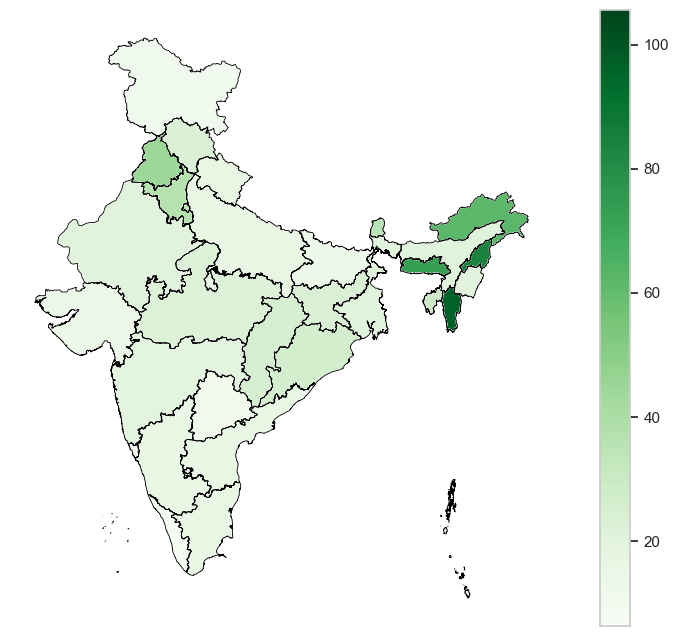

In [76]:
# PLOT MAP

'''
COLOURS:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd',
'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',
'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn',
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot',
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis',
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 
'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 
'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
'''
'''
Set2 , Wistia , 
'''

value_column = 'sc_st_ratio_households'

sns.set(style="whitegrid")  # Set seaborn style
sns.despine()  # Remove spines

# Create a figure and axis object
ax = map_data.boundary.plot(edgecolor="black" , linewidth=0.6 , figsize=(12,8))
map_data.plot(ax=ax, column=value_column , legend="True" , cmap='Greens') # Wistia

# for idx, row in map_data.iterrows():
# 	if row['change'] > 0:
# 	    change = "+" + str(round(row['change'] , 1))
# 	else:
# 	    change = "-" + str(round(row['change'] , 1))

# 	centroid = row.geometry.centroid
# 	ax.annotate(change, xy=(centroid.x, centroid.y), xytext=(0,0), textcoords="offset points", fontsize=9, color='darkred',fontfamily='serif')


# Set plot title and labels
# ax.set_title("Number of Crimes Registered against SC/ST folx in 2022")
plt.axis("off")

# Save the plot
# plt.savefig('Registered_Crimes_SC_ST_2022.png' , dpi=300 , bbox_inches='tight')
plt.show()